In [8]:
import warnings; warnings.simplefilter('ignore')

import hotspot
import scanpy as sc
import muon as mu

import numpy as np
import mplscience
import os
hotspot.__version__

'1.1.1'

In [9]:
import scvi
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

Global seed set to 0


Last run with scvi-tools version: 0.14.5


In [10]:
os.chdir("/data5/maolp/Gaofeng_All_matrix/Allcount/All_h5")

In [11]:
import glob
H5data=[]
for line in  glob.glob("*h5"):
    # print(line)
    H5data.append(line)
print(H5data)

['Z48_filtered_feature_bc_matrix.h5', 'Z53_filtered_feature_bc_matrix.h5', 'Z96_filtered_feature_bc_matrix.h5', 'D25_filtered_feature_bc_matrix.h5', 'D36_filtered_feature_bc_matrix.h5', 'Z99_filtered_feature_bc_matrix.h5', 'Z38_filtered_feature_bc_matrix.h5', 'Z67_filtered_feature_bc_matrix.h5', 'Z07_filtered_feature_bc_matrix.h5', 'B25_filtered_feature_bc_matrix.h5', 'D9_filtered_feature_bc_matrix.h5', 'D27_filtered_feature_bc_matrix.h5', 'Z52_filtered_feature_bc_matrix.h5', 'Z47_filtered_feature_bc_matrix.h5', 'Z77_filtered_feature_bc_matrix.h5', 'Z03_filtered_feature_bc_matrix.h5', 'C10_filtered_feature_bc_matrix.h5', 'Z42_filtered_feature_bc_matrix.h5', 'C27_filtered_feature_bc_matrix.h5', 'C36_filtered_feature_bc_matrix.h5', 'Z70_filtered_feature_bc_matrix.h5', 'Z79_filtered_feature_bc_matrix.h5', 'z104_filtered_feature_bc_matrix.h5', 'Z36_filtered_feature_bc_matrix.h5', 'Z43_filtered_feature_bc_matrix.h5', 'Z28_filtered_feature_bc_matrix.h5', 'Z33_filtered_feature_bc_matrix.h5', 

In [20]:
filenames =H5data
adatadict_sc={}
# adatas = []
# scrub_doublet_rate=pd.DataFrame()
i=0
for filename in filenames: 
    
    dat1=sc.read_10x_h5(filename)
    name=filename.rsplit("_")[0]
    dat1.obs_names=name+"_"+dat1.obs_names 
    dat1.obs["Name"]=name 
    dat1.var_names_make_unique() 
    sc.pp.calculate_qc_metrics(dat1, percent_top=None, log1p=False, inplace=True)
    i+=1
    adatadict_sc[name]=dat1

In [21]:
# Import the required function
from anndata import concat

# Get the list of Anndata objects from the dictionary
adata_list = list(adatadict_sc.values())

# Concatenate the Anndata objects
adata_merged = concat(adata_list, join='outer')


In [14]:
adata1=sc.read_h5ad('/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad')

In [22]:
adata=adata_merged[adata1.obs_names,:]

In [28]:
adata.obs

,Name,n_genes_by_counts,total_counts,_scvi_batch,_scvi_labels,AdjustedID
Z48_AAACCTGAGATAGGAG-1,Z48,2894,8300.0,0,0,B17.4_P3
Z48_AAACCTGAGGCACATG-1,Z48,340,3925.0,0,0,B17.4_P3
Z48_AAACCTGAGGTGCAAC-1,Z48,630,3829.0,0,0,B17.4_P3
Z48_AAACCTGCAAGAGTCG-1,Z48,476,4006.0,0,0,B17.4_P3
Z48_AAACCTGCACACCGAC-1,Z48,261,2525.0,0,0,B17.4_P3
...,...,...,...,...,...,...
Z123_TTTGTCATCGCAAGCC-1,Z123,211,2110.0,0,0,B22.4_P23
Z123_TTTGTCATCTAACTCT-1,Z123,362,3535.0,0,0,B22.4_P23
Z123_TTTGTCATCTACTTAC-1,Z123,1449,3347.0,0,0,B22.4_P23
Z123_TTTGTCATCTCCCTGA-1,Z123,1389,2923.0,0,0,B22.4_P23


In [24]:
adata.obs_names.equals(adata1.obs_names)

True

In [27]:
adata.obs["AdjustedID"]=adata1.obs["AdjustedID"]

In [29]:
adata.layers['counts'] = adata.X.copy()

scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["AdjustedID"],
                             continuous_covariate_keys=['total_counts'])

model = scvi.model.SCVI(adata)

INFO     No batch_key inputted, assuming all cells are same batch                                                  
INFO     No label_key inputted, assuming all cells have same label                                                 
INFO     Using data from adata.layers["counts"]                                                                    
INFO     Successfully registered anndata object containing 245834 cells, 36601 vars, 1 batches, 1 labels, and 0    
         proteins. Also registered 1 extra categorical covariates and 1 extra continuous covariates.               
INFO     Please do not further modify adata until model is trained.                                                


In [31]:
model.train() 

GPU available: False, used: False
TPU available: False, using: 0 TPU cores


Epoch 13/33:  36%|██████▉            | 12/33 [20:30:25<29:54:39, 5127.60s/it, loss=5e+03, v_num=1]

In [ ]:
adata.obsm['X_scVI'] = model.get_latent_representation()

adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

sc.pp.neighbors(adata, use_rep = 'X_scVI')

sc.tl.umap(adata)

In [ ]:
import scanpy as sc
import scvi
import os
import warnings; warnings.simplefilter('ignore')

### 在131重复上面的操作即可，env为FUCKSCVI，由于131的运存太小，所以保存关键数据后再继续处理下面这步骤
# adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

In [32]:
# adata.write_h5ad('/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/scvi_dedif.h5ad')
adata=sc.read_h5ad('/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/scvi_dedif.h5ad')

In [ ]:
# import pickle
# with open('/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/model.pkl', 'wb') as file:
#     pickle.dump(model, file)

In [34]:
# import pickle



# with open('/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/model.pkl', 'rb') as file:
#     model = pickle.load(file)



In [35]:
sc.pp.neighbors(adata, use_rep = 'X_scVI')

Epoch 1/33:   0%|                                                       | 0/33 [23:45:18<?, ?it/s]


In [36]:
sc.tl.umap(adata)

In [37]:
adata

AnnData object with n_obs × n_vars = 245834 × 36601
    obs: 'Name', 'n_genes_by_counts', 'total_counts', 'AdjustedID', '_scvi_batch', '_scvi_labels'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'neighbors', 'umap'
    obsm: 'X_scVI', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs', 'X_umap'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

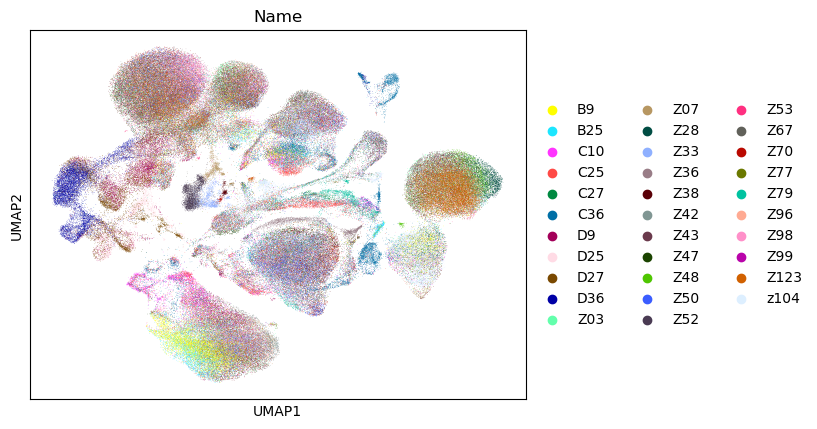

In [38]:
sc.pl.umap(adata,color=['Name'])

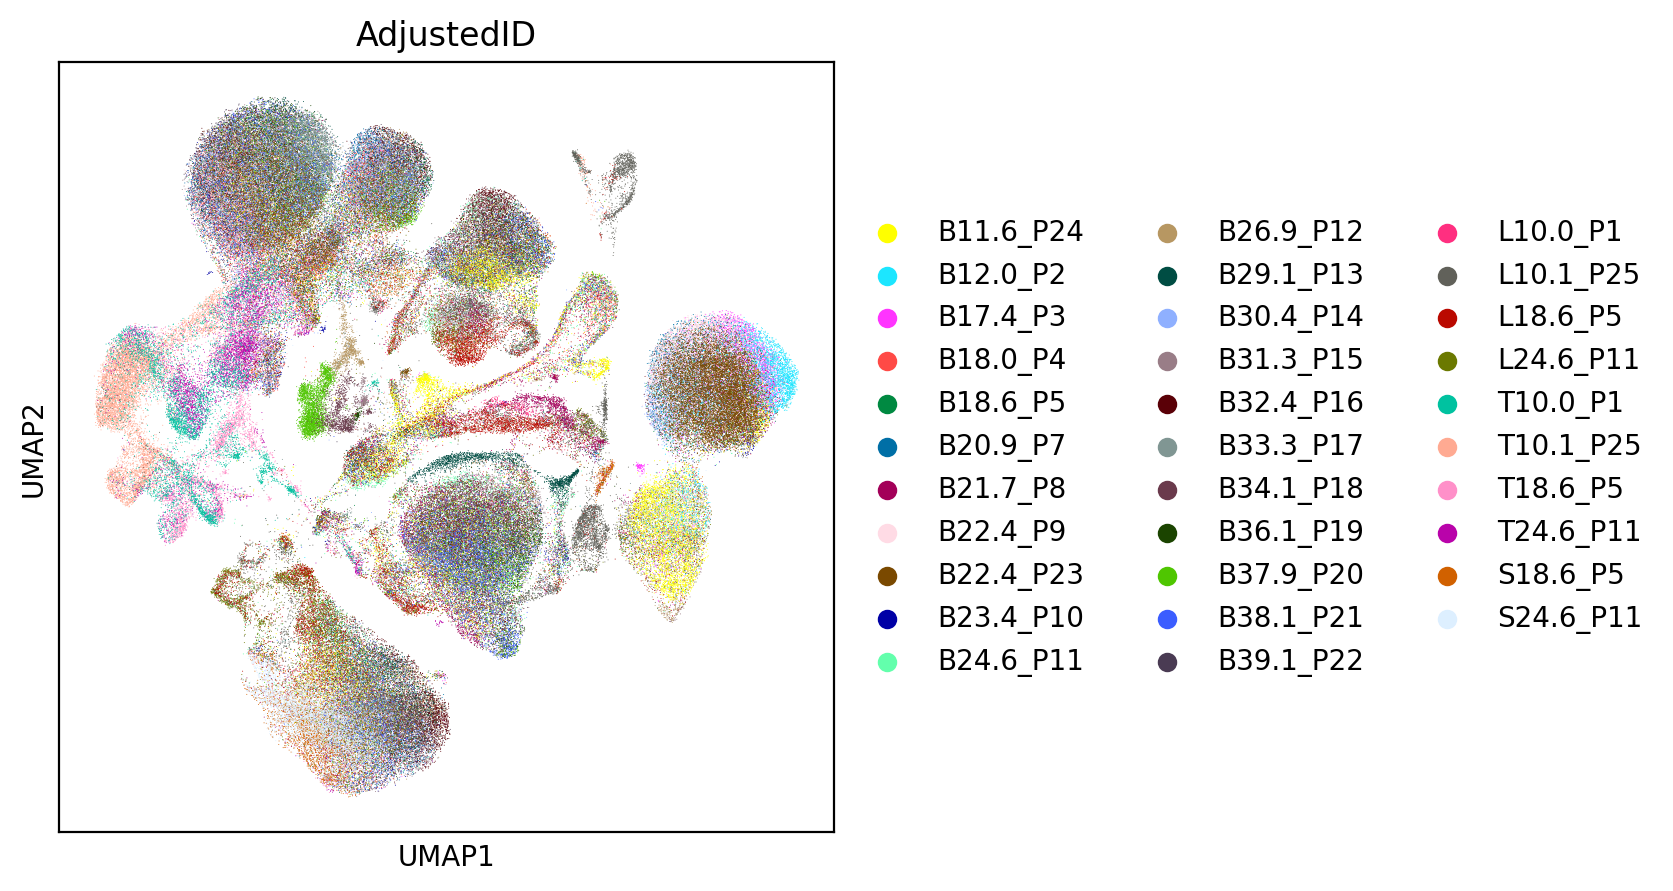

In [50]:
sc.pl.umap(adata,color=['AdjustedID'])

In [39]:
adata.obs_names.equals(adata1.obs_names)

True

In [40]:
adata1

AnnData object with n_obs × n_vars = 245834 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'AdjustedID_colors', 'Cell_lineage_colors', 'Last_cell_type_num_colors', 'New_Body_colors', 'TCRBCRlabel_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [44]:
adata.obs['Last_cell_type']=adata1.obs['Last_cell_type']

In [42]:
adata.obs['New_Body']=adata1.obs['New_Body']

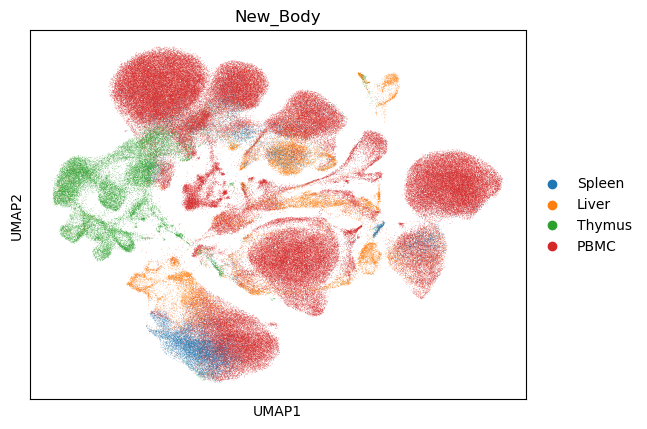

In [43]:
sc.pl.umap(adata,color=['New_Body'])

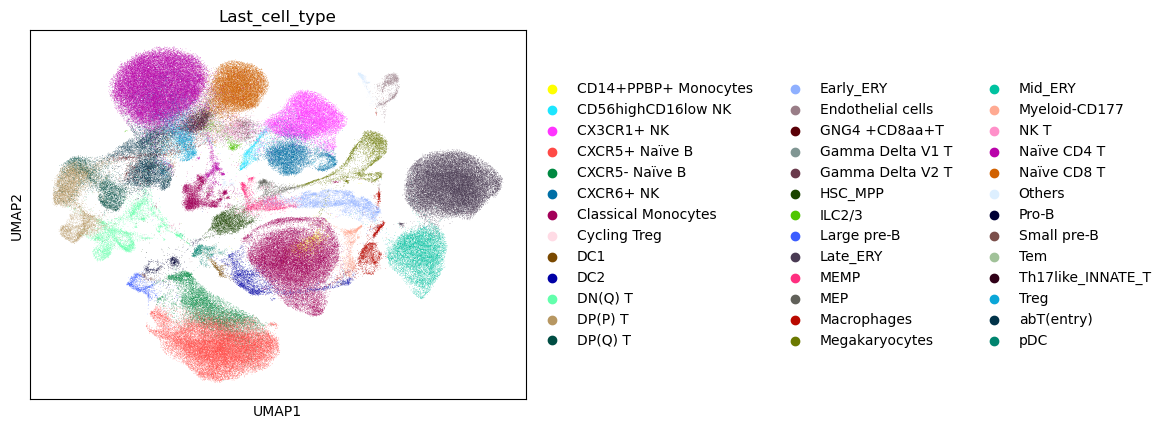

In [45]:
sc.pl.umap(adata,color=['Last_cell_type'])

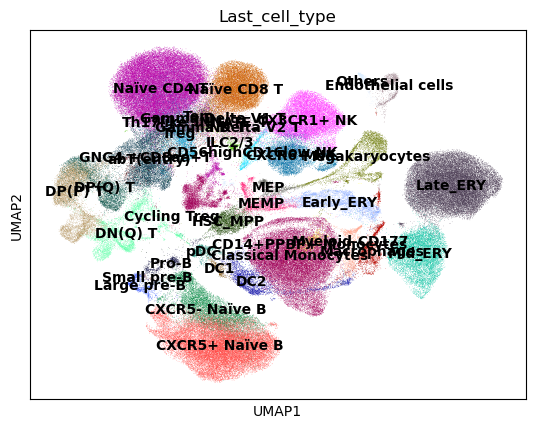

In [46]:
sc.pl.umap(adata,color=['Last_cell_type'],legend_loc='on data')

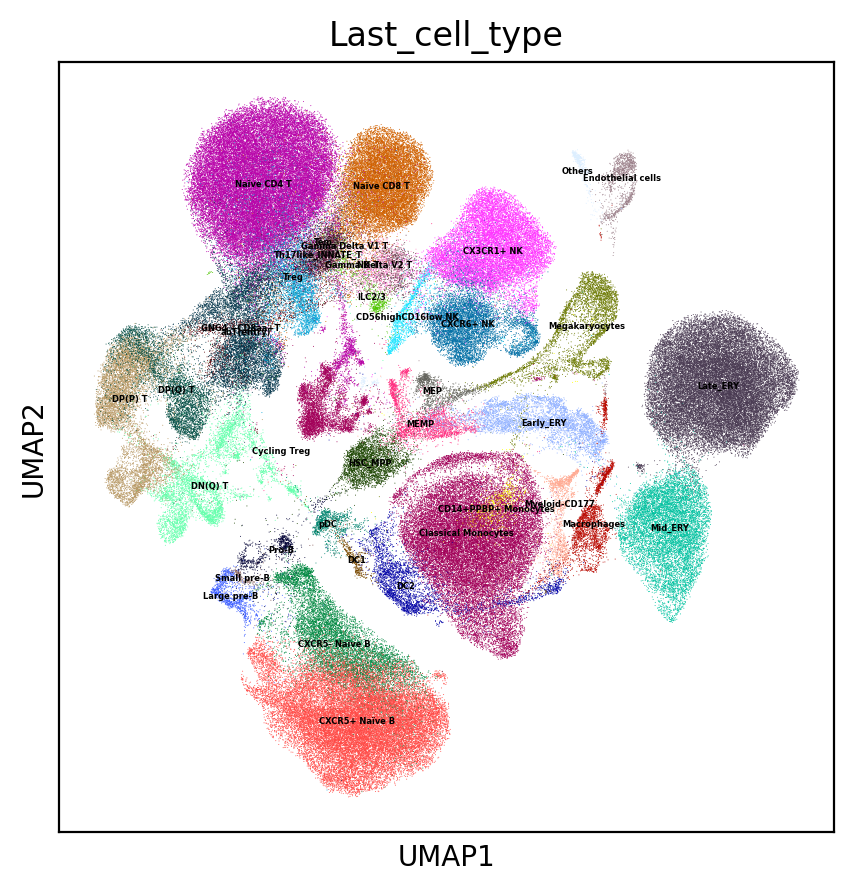

In [49]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 200
sc.pl.umap(adata,color=['Last_cell_type'],legend_loc='on data',legend_fontsize=3)